### daa Hackathon - Quick Introduction

The purpose of this notebook is to introduce you to some key aspects of the dataset for this challenge.

We will look at the following:
* in our dataset, how many passengers fly each week?
* what is the distribution of total passengers by flight?
* what is the concept of "passenger presentation profile" for a flight? 
* flight presentation profile visualiser
* how does passenger presentation profile differ by some of the factors in our dataset?
* how is the target variable structured in this model?
* leaks
* some watch-outs for the target

*Please also remember that the dataset we are using is a sample of the flights leaving Dublin Airport over the period we have shared. And with the approach to the challenge, this dataset is not perfectly representative of activity in Dublin Airport but it is very close.*

In [55]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from IPython.display import display, Javascript

from ggplot import *

%matplotlib inline

In [56]:
# transposes dataset from wide (the target data for each flight is in 17 columns) to long (the target data for each flight is in 17 rows)
def create_transposed_df(df_this_df, s_index_col):
    
    df_transposed = df_this_df.transpose().reset_index()
    df_transposed.columns = df_transposed.iloc[0]
    df_transposed = df_transposed.ix[1:]

    df_transposed = df_transposed.set_index(s_index_col)

    l_15_min_intervals = ['0-14','15-29','30-44','45-59', '60-74', '75-89', '90-104', '105-119', '120-134', '135-149', '150-164', '165-179', '180-194', '195-209', '210-224', '225-239', '240 plus']
    df_transposed.index = l_15_min_intervals

    return df_transposed

In [57]:
# creates presentation profile charts
def create_plot(df_for_charting, s_title, l_linewidths):
    
    fig_pres_profile, ax = plt.subplots(figsize = (16,7))
    for col, lw in zip(df_for_charting.columns, l_linewidths):
        df_for_charting[col].plot(lw=lw, ax=ax)

    ax.set_xlabel("15 Minute Block prior to sceheduled departure time")
    ax.set_xticklabels(df_for_charting.index, rotation = 90)
    ax.set_xticks(range(len(df_for_charting.index)))
    ax.invert_xaxis()
    ax.set_ylabel("Num Pax")
    ax.legend(title = None, loc = 'best')
    ax.set_title(s_title)
    
    return fig_pres_profile

In [58]:
# Create facet charts in ggplot
def create_facet_plot(s_col_for_faceting):
    
    df_faceted = df_raw_data_amt[df_raw_data_amt['num_flight_year'] >= 2014][[s_col_for_faceting] + l_target_vars + ['total_pax']]
    df_faceted = df_faceted.groupby(s_col_for_faceting).sum().reset_index()
    df_faceted = pd.concat([df_faceted[s_col_for_faceting], df_faceted[l_target_vars].divide(df_faceted['total_pax'], 0)], axis = 1)
    df_faceted = pd.melt(df_faceted, id_vars = [s_col_for_faceting])

    gsize = theme_matplotlib(rc={"figure.figsize": "13, 15"}, matplotlib_defaults=False)

    gg_plt = ggplot(aes('variable', 'value'), df_faceted)
    gg_plt = gg_plt + geom_bar(stat='bar', fill = 'blue') + scale_x_reverse() + facet_grid(s_col_for_faceting) + theme_bw() + gsize + ggtitle("240+ mins before STD                                                 ------->                                                          0-14 mins before STD")
    
    return gg_plt

In [59]:
def rerun_cell(btn):
    display(Javascript('IPython.notebook.execute_cell()'))

In [60]:
s_raw_data_folder = 'S:/Public/ADA Team/Hackathon/'
s_raw_data_file = 'train.csv' 

df_raw_data_amt = pd.read_csv(s_raw_data_folder + s_raw_data_file, parse_dates = ['dt_prediction_date', 'dt_target_date', 'dt_flight_date'])

In [61]:
l_cols_to_use = ['cat_case_type', 'dt_flight_date', 'num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 
                   'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 
                   'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 
                   'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 
                   'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 
                   'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']

l_target_vars = ['num_pax_000_014_mins_before_sdt', 'num_pax_015_029_mins_before_sdt', 
                   'num_pax_030_044_mins_before_sdt', 'num_pax_045_059_mins_before_sdt', 'num_pax_060_074_mins_before_sdt', 
                   'num_pax_075_089_mins_before_sdt', 'num_pax_090_104_mins_before_sdt', 'num_pax_105_119_mins_before_sdt', 
                   'num_pax_120_134_mins_before_sdt', 'num_pax_135_149_mins_before_sdt', 'num_pax_150_164_mins_before_sdt', 
                   'num_pax_165_179_mins_before_sdt',  'num_pax_180_194_mins_before_sdt', 'num_pax_195_209_mins_before_sdt', 
                   'num_pax_210_224_mins_before_sdt', 'num_pax_225_239_mins_before_sdt', 'num_pax_240plus_mins_before_sdt']

In [62]:
# Start by creating a column for the total pax per flight
df_raw_data_amt['total_pax'] = df_raw_data_amt.loc[:,l_target_vars].sum(axis=1)

### In our dataset, how many passengers fly each week?

To start off, let's get a sense of <b>how many passengers fly each week</b> and the seasonality in the number of passengers travelling. Let's look at the number of passengers travelling in each week in 2014 and 2015. 

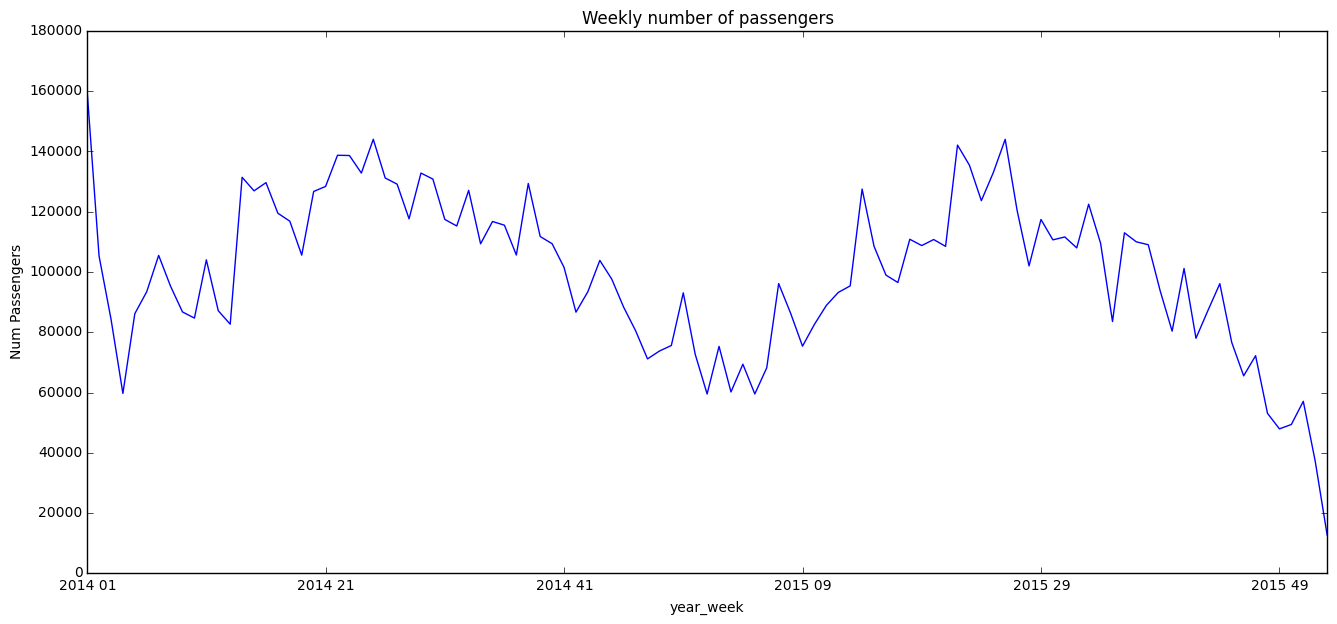

In [63]:
df_weekly_pax = df_raw_data_amt[['num_flight_year', 'num_flight_weekofyear', 'total_pax'] + l_target_vars]
df_weekly_pax = df_weekly_pax[df_weekly_pax['num_flight_year'] >= 2014]
df_weekly_pax = pd.DataFrame(df_weekly_pax.groupby(['num_flight_year', 'num_flight_weekofyear'])['total_pax'].sum()).reset_index()
df_weekly_pax['year_week'] = df_weekly_pax['num_flight_year'].apply(str) + ' ' + df_weekly_pax['num_flight_weekofyear'].map(str).str.zfill(2)

fig_weekly_passengers = df_weekly_pax.plot.line(x = 'year_week', y = 'total_pax', figsize = (16,7), title = 'Weekly number of passengers')
fig_weekly_passengers.set_ylabel("Num Passengers")
fig_weekly_passengers.legend().remove()

### What is the distribution of total passengers by flight?

Next, let's next look at the <b>distribution of total passengers per flight.</b>

We can see that the range is large, with some flights carrying over 300 passengers but there is a large spike around 165 - 185 passengers

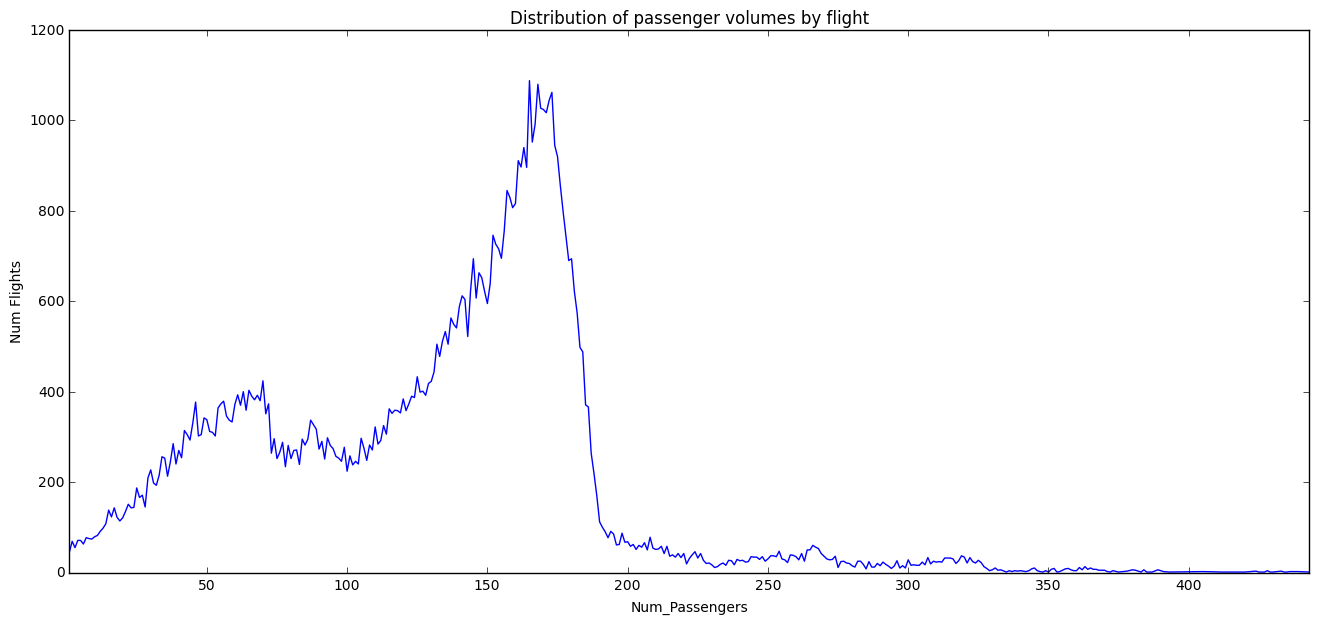

In [64]:
df_pax_density = pd.DataFrame(df_raw_data_amt[df_raw_data_amt['num_flight_year'] >= 2014]['total_pax'].value_counts()).reset_index().rename(columns = {'index': 'Num_Passengers', 'total_pax': 'Num_Flights'}).sort_values('Num_Passengers')

fig_density = df_pax_density.plot.line(x = 'Num_Passengers', y = 'Num_Flights', figsize = (16,7), title = 'Distribution of passenger volumes by flight')
fig_density.set_ylabel("Num Flights")
fig_density.legend().remove()

### What is the concept of "passenger presentation profile" for a flight? 

Let's take an example flight and walk through the <b>concept of passenger presentation profile.</b>

Passenger presentation profile is simply the *distribution of when the passengers for a given flight present / arrive at security for screening before they fly.*

In this challenge, we have <b>17 target values for each flight</b> that we are asking you to predict. Each one of those values is <b>the number of passengers that arrived at security in each of the 15 minute intervals covering the four hours before the flight departed</b>

In [65]:
i_id = 6002
df_this_id = df_raw_data_amt[(df_raw_data_amt['id'] == i_id)]

# get the date of the most recent explanatory case
s_max_expl_case = df_this_id['dt_flight_date'][df_this_id['cat_case_type'] == 'Expl'].max().strftime('%d-%m-%Y')

# get a list of all explanatory dates for the week prior to prediction date
td_one_week_prior_to_pred_date = df_this_id['dt_prediction_date'].unique()[0] - np.timedelta64(6,'D')
l_dates_wk_prior_to_pred_date = df_this_id[(df_this_id['cat_case_type'] == 'Expl') & (df_this_id['dt_flight_date'] >= td_one_week_prior_to_pred_date)]['dt_flight_date'].dt.strftime('%d-%m-%Y').tolist()
l_dates_wk_prior_to_pred_date = ['Expl ' + s_date for s_date in l_dates_wk_prior_to_pred_date]

df_this_id = df_this_id[l_cols_to_use]

df_this_id['case_type_and_flight'] = df_this_id['cat_case_type'] + ' ' + df_this_id['dt_flight_date'].dt.strftime('%d-%m-%Y')
s_case_type_and_flight = df_this_id['case_type_and_flight']
df_this_id.drop('case_type_and_flight', axis=1,inplace = True)
df_this_id.insert(0, 'case_type_and_flight', s_case_type_and_flight)
df_this_id.drop(['cat_case_type', 'dt_flight_date'], axis=1, inplace=True)

df_this_pred = df_this_id[df_this_id['case_type_and_flight'].str.contains('Expl')]
df_this_target = df_this_id[df_this_id['case_type_and_flight'].str.contains('Target')]

Let's look at the presentation profile for ID 6002 from our training dataset and the flight on the date of October 21st 2014

On the right-hand side of this chart, we have the bucket "0 - 14", which tells us how many people arrived at security in the 15 minutes right before the flight departed. On the left-hand side of the chart, we see the bucket "240 plus", which tells us how many people arrived at security four or more hours before the flight departed.

When we look at the chart, we can see that the vast majority of passengers presented between 1 hour and 2.5 hours before their flight was due to depart. The shape of this curve is the passenger presentation profile for this particular flight

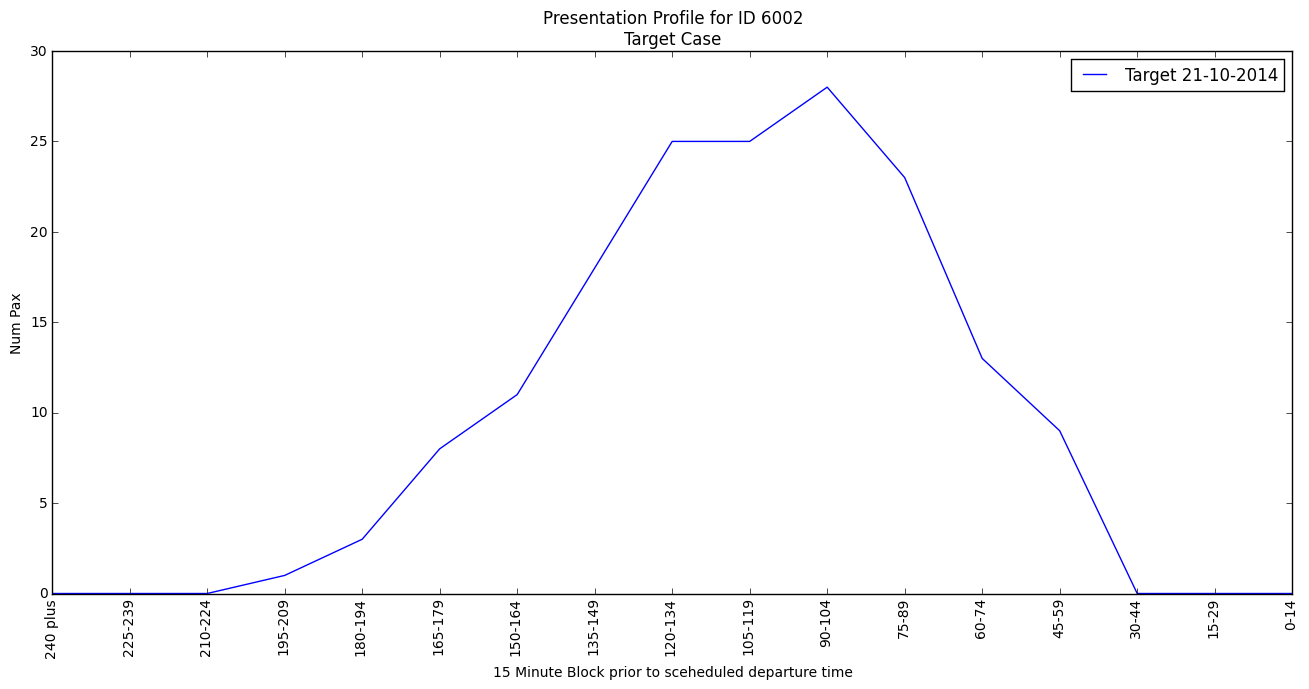

In [66]:
# transpose and plot the target
s_index_col = 'case_type_and_flight'
df_this_target_transposed = create_transposed_df(df_this_target, s_index_col)
s_title = 'Presentation Profile for ID ' + str(i_id) + '\nTarget Case'

# set the linewidths and plot
l_linewidths = [1]
fig_target = create_plot(df_this_target_transposed, s_title, l_linewidths)

We can add the historical flight presentation profiles for the flight ID.

We have 9 cases of historical data for this flight ID, ranging from 3 days to 6 months prior to the target date.

The distributions of the historical presentation profiles follow a similar trend to the profile which is to be predicted. The majority of passengers for the flight historically presented between 1 hour and 2.5 hours before their flight was due to depart. One source of complexity in this challenge is the volatility in terms of volume for the passenger presentation profile.

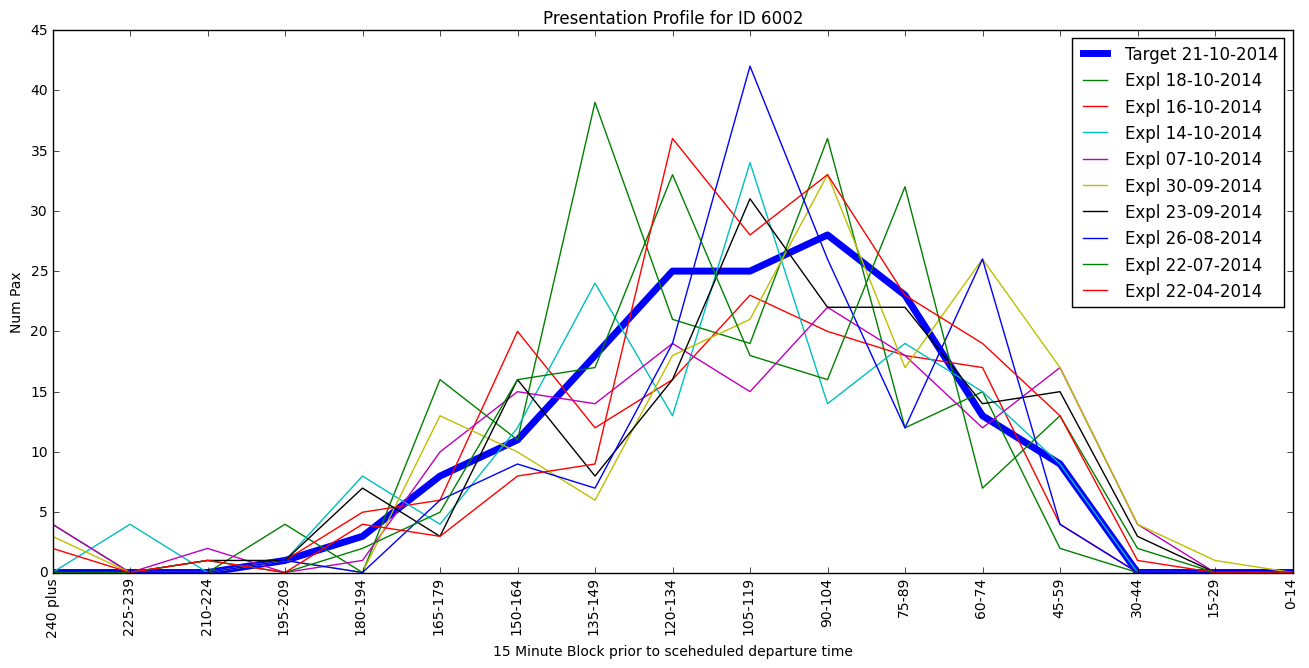

In [67]:
s_index_col = 'case_type_and_flight'
df_this_id_transposed = create_transposed_df(df_this_id, s_index_col)

# Set the linewidths, the first, the target, set to 5, all explanatory left at 1
l_linewidths = [5] + [1]*(df_this_id_transposed.shape[1] - 1)
# Plot the data
s_title = 'Presentation Profile for ID ' + str(i_id)
fig_pres_profile =  create_plot(df_this_id_transposed, s_title, l_linewidths)

### Flight presentation profile visualiser

We have found it very instructive to visualise individual examples from the dataset to get a real feel for the dataset and what we are trying to predict

To this end, we have built a tool that allows you to visualise individual target cases.

You can find it in the github repository as a separate file entitled ""

### How does passenger presentation profile differ by some of the factors in our dataset?

To gain an intuition of some of the ways in which passenger presentation profile can also differ, look through the charts below which show <b>how the distribution of when passengers present differs</b> (or does not differ) by:
* where they are travelling to
* whether they are travelling to a more business or leisure destination
* whether they are travelling on a route for which passengers are more or less likely to check-in a bag
* the scheduled hour for flight departure

Please feel free to get the original notebook for this page on github and look at other factors

<b><i>Presentation profile by destination group.</i></b>

Passengers travelling to destination groups 1, 7 and 10 appear to have similar presentation profiles.

The distribution of passengers presenting at security is skewed to the right for other destinations such as 2 and 4. This indicates that passengers to these destinations leave it closer to the scheduled departure time (STD) to present at security. 

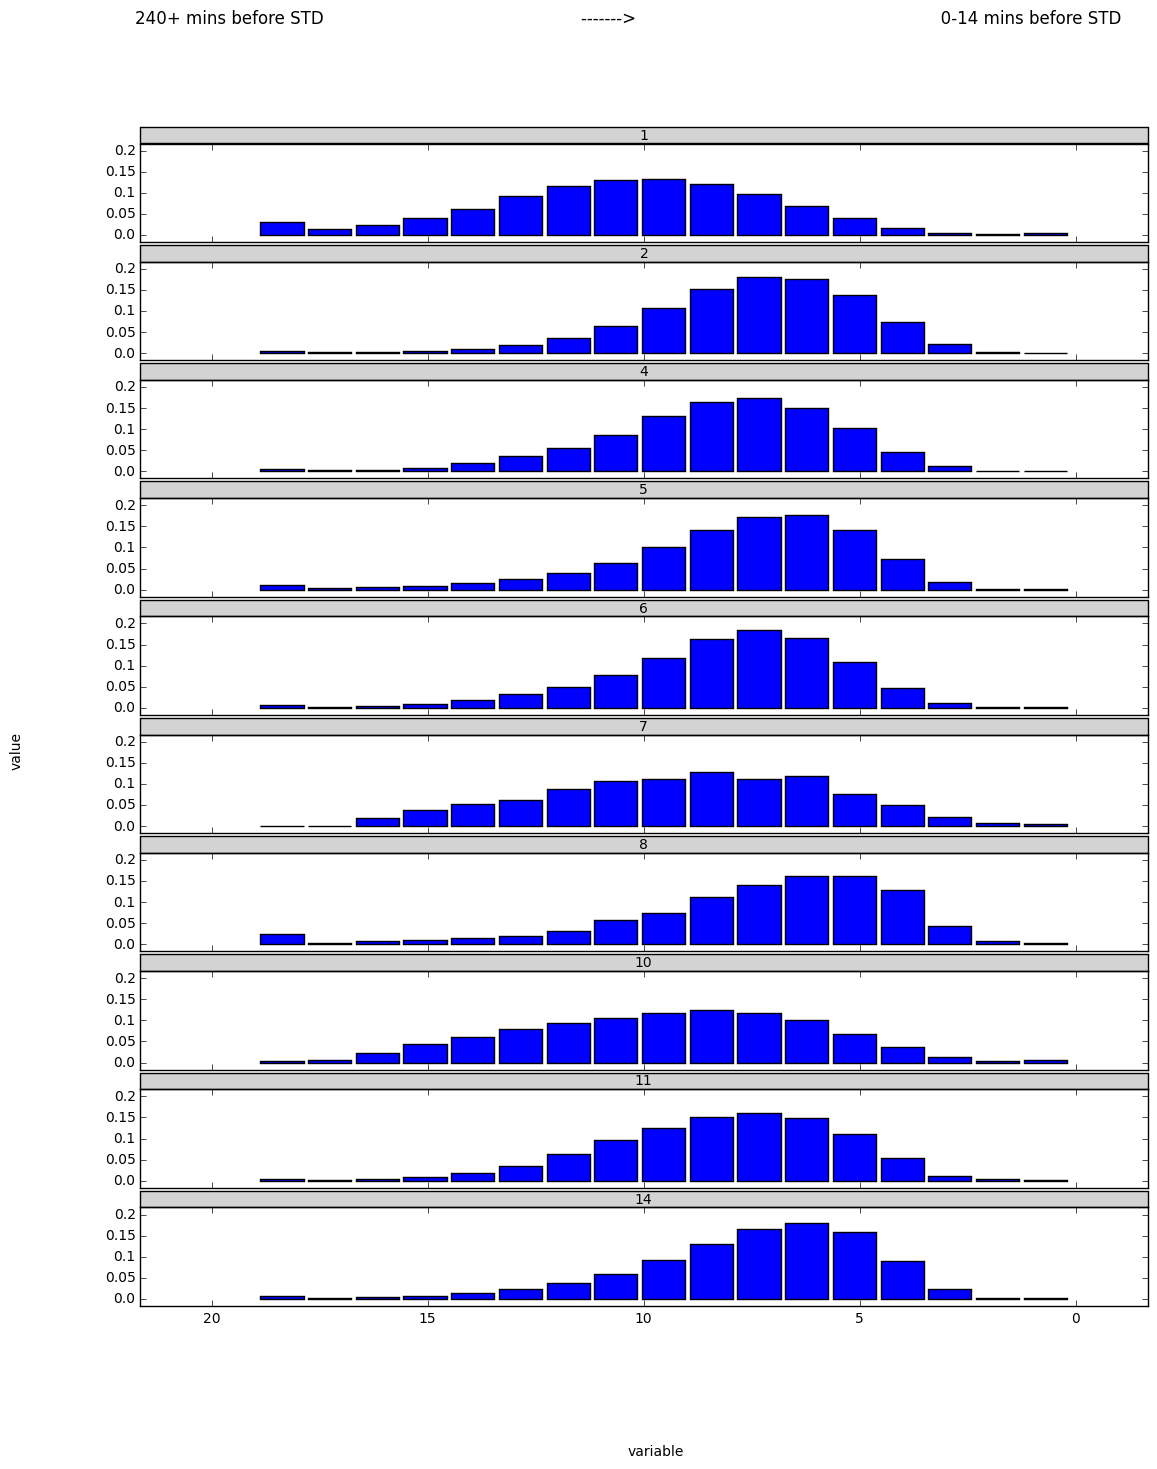

<ggplot: (-9223372036836163349)>


In [68]:
#print('Looking at the average presentation profile by destination group....')
gg_plt_destination = create_facet_plot('cat_destination_group_id')
print(gg_plt_destination)

<b><i>Presentation profile for % of passengers flying for leisure purposes</i></b>

The distribution is skewed to the right for flights with a low percentage of passengers flying for leisure purposes (1 & 2), indicating that these passengers leave it closer to STD when presenting at security.

As the percentage of passengers flying for leisure purposes increases (3 & 4), the distribution becomes less skewed, suggesting that passengers present at security earlier and give themselves more time airside.

Interestingly, the profile for flights with the highest percentage of passengers flying for leisure purposes (5) is similar to the profile for flights with the lowest percentage of leisure passengers (1).

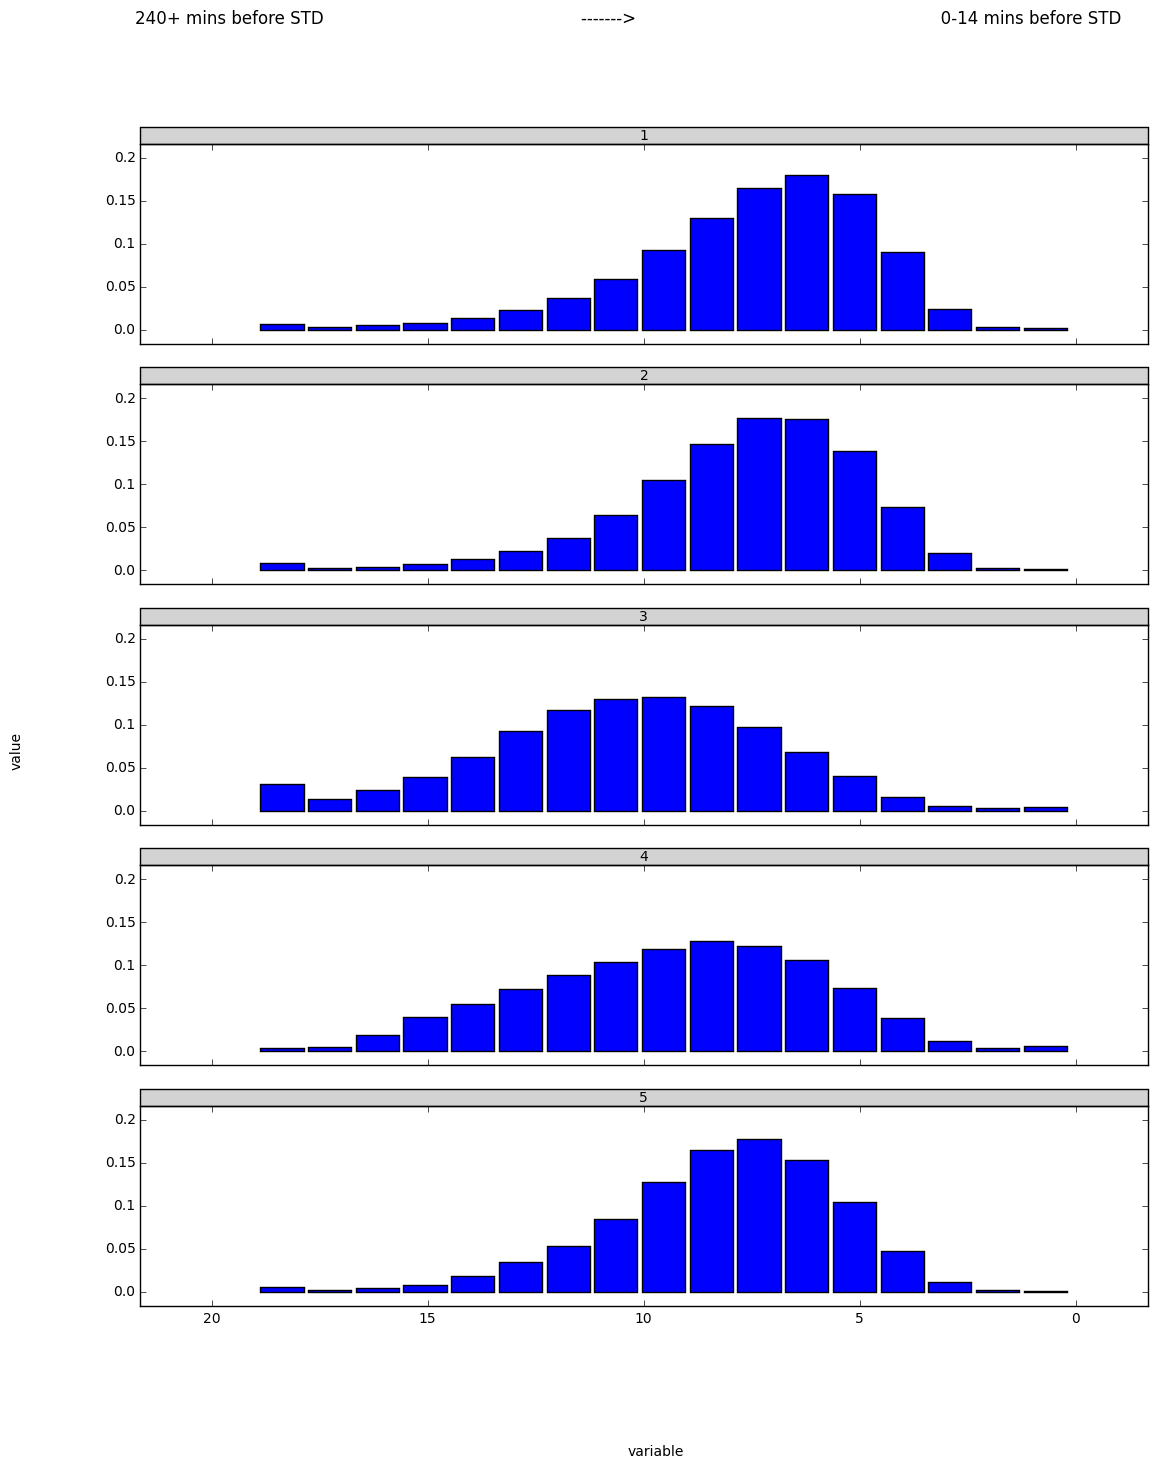

<ggplot: (11807629)>


In [69]:
# plot by ordinal variable for % of leisure
#print('Next we look at the ordinal variable for % of passengers flying for leisure purposes....')
gg_plt_leisure = create_facet_plot('ord_leisure')
print(gg_plt_leisure)

<b><i>Presentation profile for % of passengers checking in a bag on the flight</i></b>

The distribution of the presentation profile is similar for the ordinal variables 1 to 4. For flights with a high percentage of passengers checking in bags (5), the profile is more normally distributed, with more passengers giving themselves more time airside 

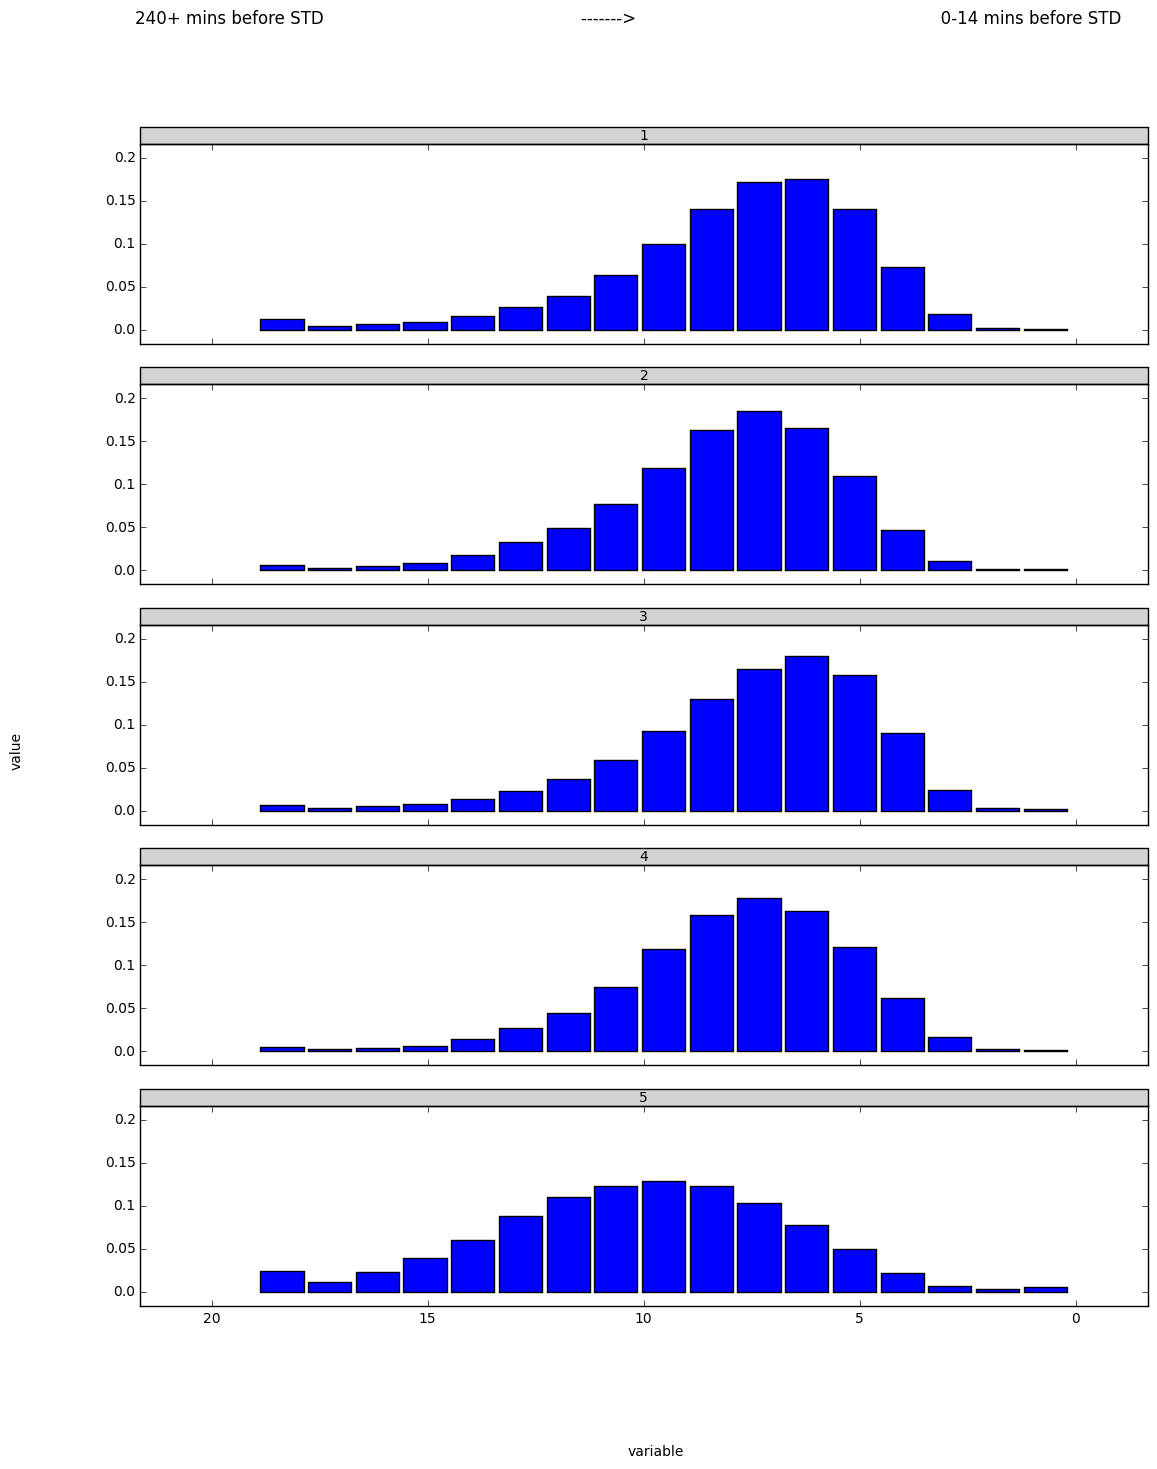

<ggplot: (-9223372036839026197)>


In [70]:
# plot by ordinal variable for % of pax who check in a bag
#print('Next we look at the ordinal variable for % of passengers who check in a bag....')
gg_plt_checkin = create_facet_plot('ord_bag_checkin')
print(gg_plt_checkin)

<b><i>Scheduled hour of flight departure</i></b>

The presentation presentation changes through the day. Passengers flying out in the morning leave it later to present at security, resulting in the distribution being skewed to the right. 

The distribution becomes less skewed in the late morning/ early afternoon and remains similar across the rest of the day.

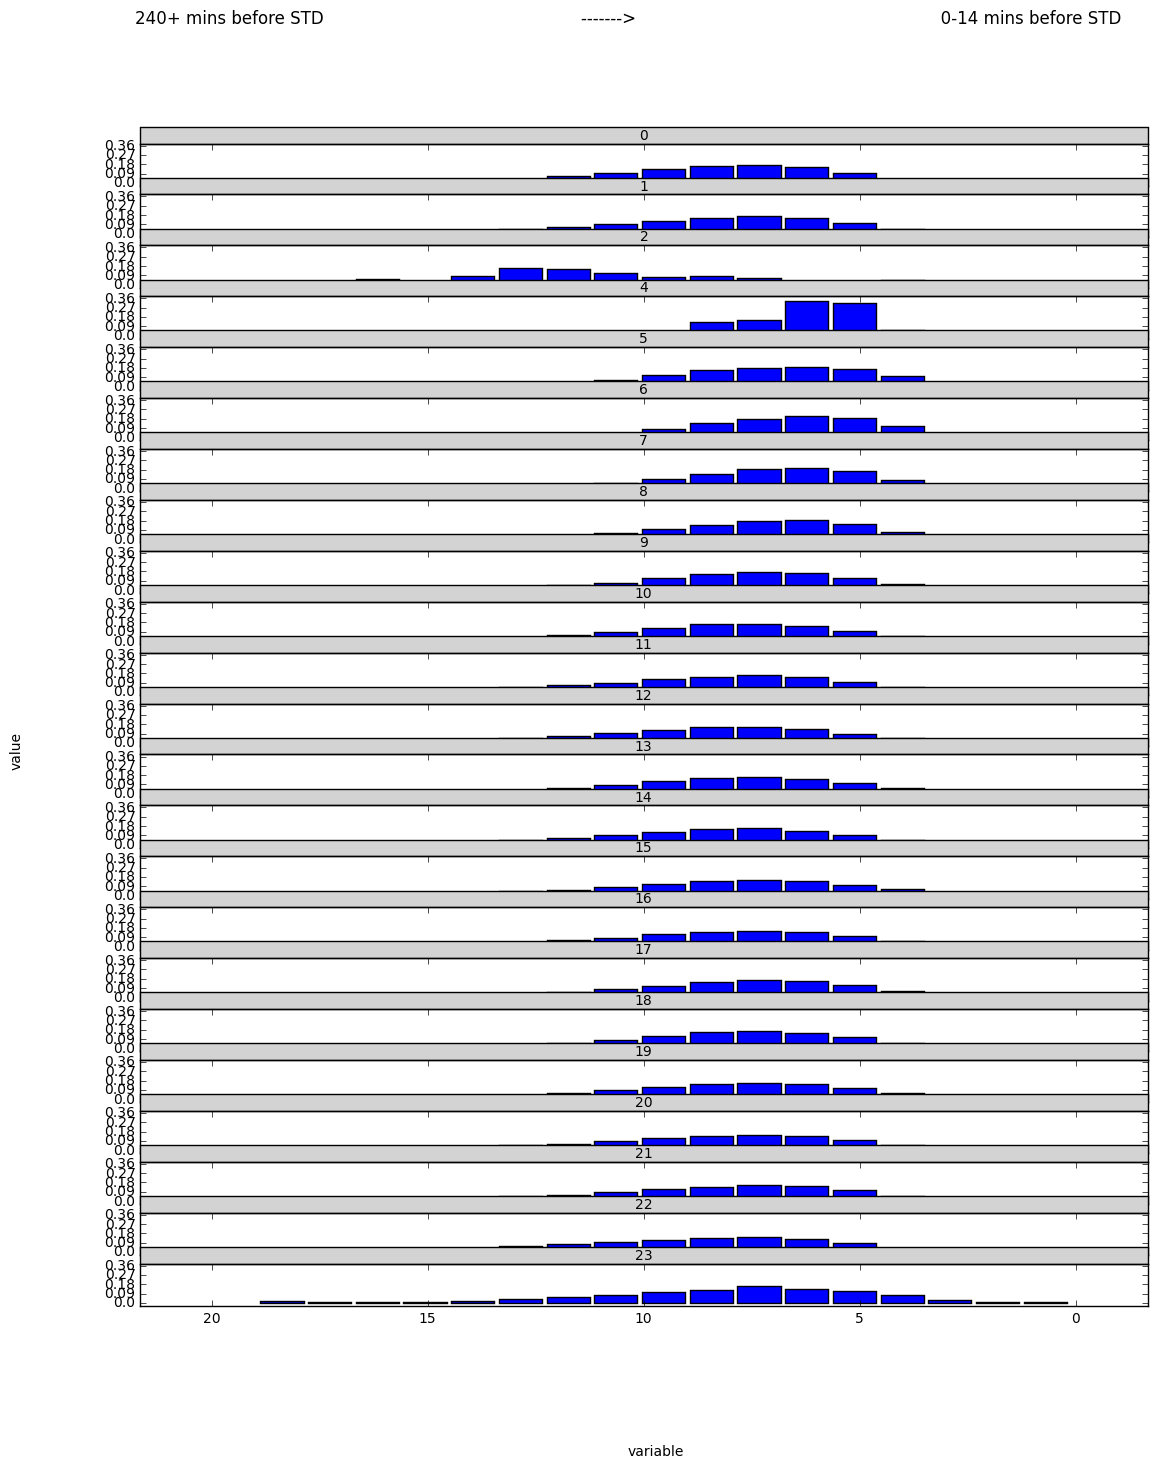

<ggplot: (-9223372036842867175)>


In [71]:
#print('Next we look at scheduled hour of departure....')
gg_plt_checkin = create_facet_plot('cat_sdt_hour')
print(gg_plt_checkin)

### How is the target variable structured in this model?

Predictions are to be made across five forward-looking windows:
* 1 day in advance
* 1 week in advance
* 4 weeks in advance
* 26 weeks in advance
* 52 weeks in advance


The model type specifieds how far in the future the prediction is for. The table below lists the model types and number of target variables in the training dataset to be predicted.

For the 1 day model type, you will be asked to make a prediction for the next day after the prediction date, whereas for the 52 week model type you will be asked to predict the date 52 weeks after the prediction date. For each model type, you will observe that you do not have data for that flight number between the prediction date and target date - this is a blackout period to minimise the possibility of data leakage e.g. for those cases in the 52 week model type, there is a blackout period for the 52 weeks prior to the target date, meaning that only data that was available prior to 52 weeks before the target date can be used for the prediction.  

In [72]:
# How many targets have we got for each model?

df_targets_per_model = df_raw_data_amt[df_raw_data_amt['cat_case_type'] == 'Target'].groupby('s_model_type')['id'].count().reset_index()
df_targets_per_model.columns = ['s_model_type', 'num_targets']
df_targets_per_model

,s_model_type,num_targets
0,01_day,4320
1,01_week,3309
2,04_weeks,2197
3,26_weeks,1173
4,52_weeks,983


### Leaks

If you use any information from any part of the dataset that comes from <u><b>after the prediction date for a given case</b></u> to predict the target, then it is a leak and your model will be considered invalid.

This also relates to any external data sources that you may use.

### Some watch-outs for the target

There are some flights that you are asked to predict for which there is no historical flight data.

Why?
 * Prior to the launch of a new flight number, there is no historical flight data for that flight number
 * There is a volume of flights that departs from Dublin Airport that are one-off or irregular flights. These flight numbers might present a challenge as they do not have historical flight data but they are an on-going challenge and are important to include for this reason

The chart below shows the distribution of the number of historical flight data we have for our targets. We have over 3,000 target cases which do not have any historical historical flight data. This is a realistic representation of the challenge faced when trying to predict passenger presentation profile, where flights are added and removed from the schedule.

The target cases with no historical flight data differs across model types. For example, for the 52 week model type, where we need to make the prediction 52 weeks in advance, there are more cases with no historical flight data. The distributions of historical flight data at a total level, and by model type, are presented below.

<b><i>All model types</i></b>

Axes(0.125,0.125;0.775x0.775)


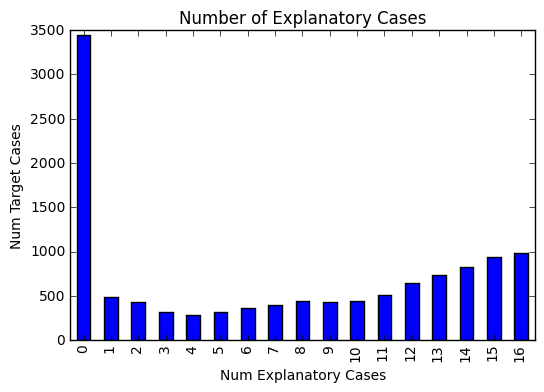

In [73]:
# how many explanatory variables have we got for each target
# subract 1 to exclude the target case
ser_counts = df_raw_data_amt['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of Explanatory Cases')
fig_count_num_expl_vars.set_xlabel("Num Explanatory Cases")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)
# We have a lot of target variables with no explanatory variables

<b><i>One day model type</i></b>

Axes(0.125,0.125;0.775x0.775)


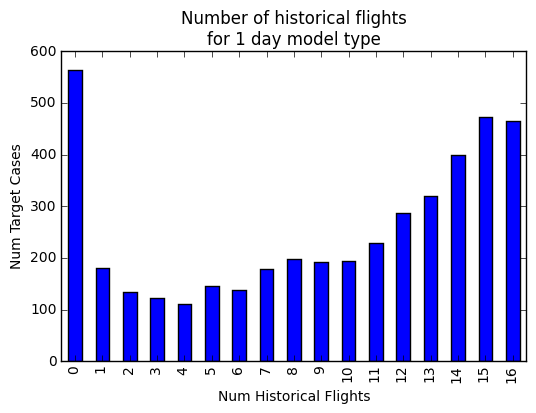

In [74]:
# How does this look for each model - start with 1 day
ser_counts = df_raw_data_amt[df_raw_data_amt['s_model_type'] == '01_day']['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of historical flights'
                                                                      + '\nfor 1 day model type')
fig_count_num_expl_vars.set_xlabel("Num Historical Flights")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)

<b><i>One week model type</i></b>

Axes(0.125,0.125;0.775x0.775)


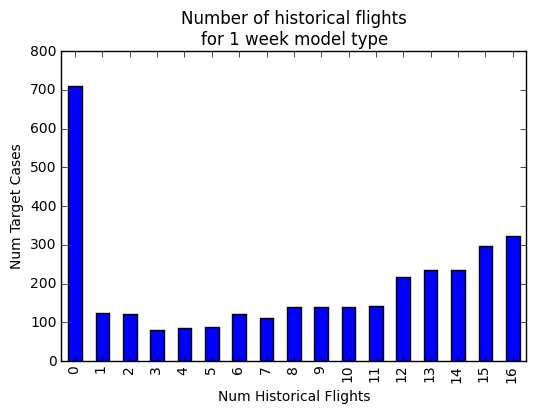

In [75]:
# 1 week
ser_counts = df_raw_data_amt[df_raw_data_amt['s_model_type'] == '01_week']['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of historical flights'
                                                                      + '\nfor 1 week model type')
fig_count_num_expl_vars.set_xlabel("Num Historical Flights")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)

<b><i>Four week model type</i></b>

Axes(0.125,0.125;0.775x0.775)


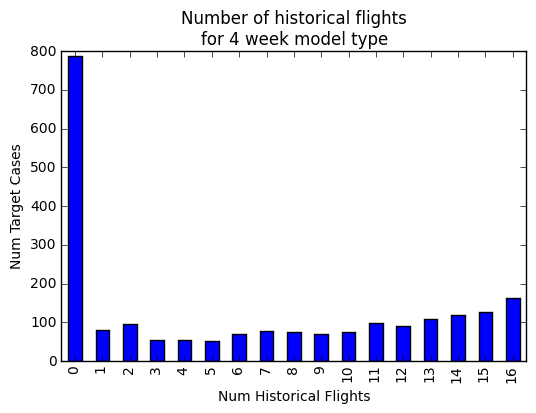

In [76]:
# 4 weeks
ser_counts = df_raw_data_amt[df_raw_data_amt['s_model_type'] == '04_weeks']['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of historical flights'
                                                                      + '\nfor 4 week model type')
fig_count_num_expl_vars.set_xlabel("Num Historical Flights")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)

<b><i>26 week model type</i></b>

Axes(0.125,0.125;0.775x0.775)


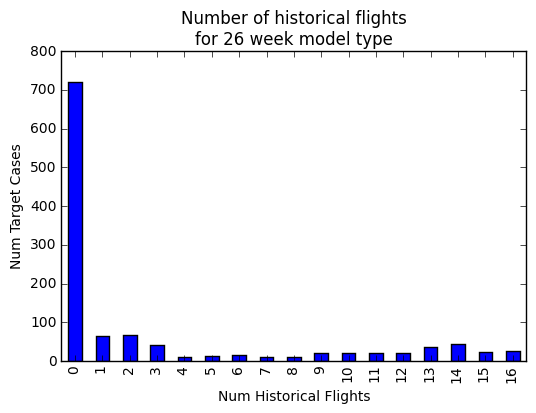

In [77]:
# 26 weeks
ser_counts = df_raw_data_amt[df_raw_data_amt['s_model_type'] == '26_weeks']['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of historical flights'
                                                                      + '\nfor 26 week model type')
fig_count_num_expl_vars.set_xlabel("Num Historical Flights")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)

<b><i>52 week model type</i></b>

Axes(0.125,0.125;0.775x0.775)


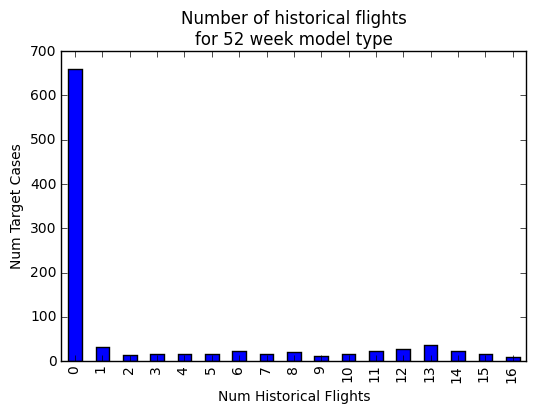

In [78]:
# 52 weeks
ser_counts = df_raw_data_amt[df_raw_data_amt['s_model_type'] == '52_weeks']['id'].value_counts() -1
fig_count_num_expl_vars = ser_counts.value_counts().sort_index().plot(kind='bar', title = 'Number of historical flights'
                                                                      + '\nfor 52 week model type')
fig_count_num_expl_vars.set_xlabel("Num Historical Flights")
fig_count_num_expl_vars.set_ylabel("Num Target Cases")
print(fig_count_num_expl_vars)

In [79]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.<br/>
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')